nr of spikes: 7


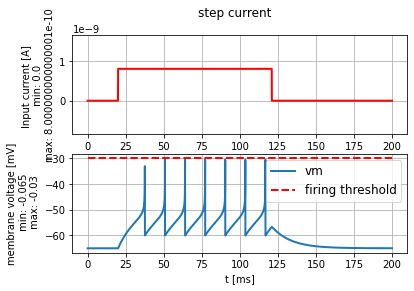

In [15]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import neurodynex3.exponential_integrate_fire.exp_IF as exp_IF
from neurodynex3.tools import plot_tools, input_factory


input_current = input_factory.get_step_current(
    t_start=20, t_end=120, unit_time=b2.ms, amplitude=0.8 * b2.namp
)

state_monitor, spike_monitor = exp_IF.simulate_exponential_IF_neuron(
    I_stim=input_current, simulation_time=200*b2.ms
)

plot_tools.plot_voltage_and_current_traces(
    state_monitor, input_current, title="step current",
    firing_threshold=exp_IF.FIRING_THRESHOLD_v_spike)
print("nr of spikes: {}".format(spike_monitor.count[0]))

nr of spikes: 1
nr of spikes: 0


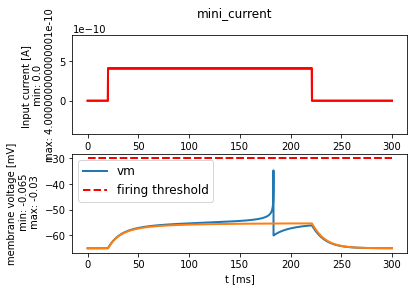

In [23]:
mini_current = (exp_IF.RHEOBASE_THRESHOLD_v_rh - exp_IF.V_REST - exp_IF.SHARPNESS_delta_T)/exp_IF.MEMBRANE_RESISTANCE_R
input_current = input_factory.get_step_current(
    t_start=20, t_end=220, unit_time=b2.ms, amplitude=mini_current+0.01*b2.namp
)

state_monitor, spike_monitor = exp_IF.simulate_exponential_IF_neuron(
    I_stim=input_current, simulation_time=300*b2.ms
)

plot_tools.plot_voltage_and_current_traces(
    state_monitor, input_current, title="mini_current",
    firing_threshold=exp_IF.FIRING_THRESHOLD_v_spike)
print("nr of spikes: {}".format(spike_monitor.count[0]))
input_current = input_factory.get_step_current(
    t_start=20, t_end=220, unit_time=b2.ms, amplitude=mini_current
)

state_monitor, spike_monitor = exp_IF.simulate_exponential_IF_neuron(
    I_stim=input_current, simulation_time=300*b2.ms
)

plot_tools.plot_voltage_and_current_traces(
    state_monitor, input_current, title="mini_current",
    firing_threshold=exp_IF.FIRING_THRESHOLD_v_spike)
print("nr of spikes: {}".format(spike_monitor.count[0]))

nr of spikes: 1


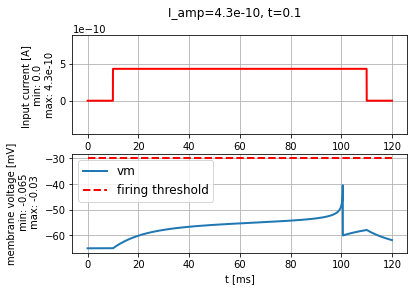

In [61]:
i=6  #change i and find the value that goes into min_amp
durations = [1,   2,    5,  10,   20,   50, 100]
min_amp =   [8.58, 4.42, 1.93, 1.10, .70, .48, .43]

t=durations[i]
I_amp = min_amp[i]*b2.namp
title_txt = "I_amp={}, t={}".format(I_amp, t*b2.ms)

input_current = input_factory.get_step_current(t_start=10, t_end=10+t-1, unit_time=b2.ms, amplitude=I_amp)

state_monitor, spike_monitor = exp_IF.simulate_exponential_IF_neuron(I_stim=input_current, simulation_time=(t+20)*b2.ms)

plot_tools.plot_voltage_and_current_traces(state_monitor, input_current,
                                           title=title_txt, firing_threshold=exp_IF.FIRING_THRESHOLD_v_spike,
                                          legend_location=2)
print("nr of spikes: {}".format(spike_monitor.count[0]))

Text(0, 0.5, 'log min amplitude [nAmp]')

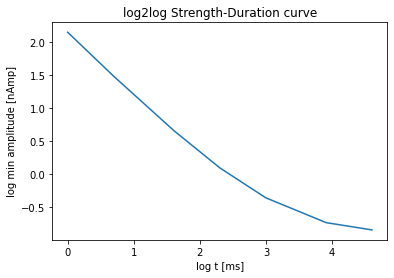

In [64]:
import math
plt.plot([math.log(dur_) for dur_ in durations], [math.log(min_) for min_ in min_amp])
plt.title("log2log Strength-Duration curve")
plt.xlabel("log t [ms]")
plt.ylabel("log min amplitude [nAmp]")